In [8]:
import pandas as pd
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


plt.style.use('default')

churn_data = pd.read_csv('data/churn.csv')
#display(churn_data.head(1))

### Задание 1 - Соотношение ушедших и лояльных клиентов

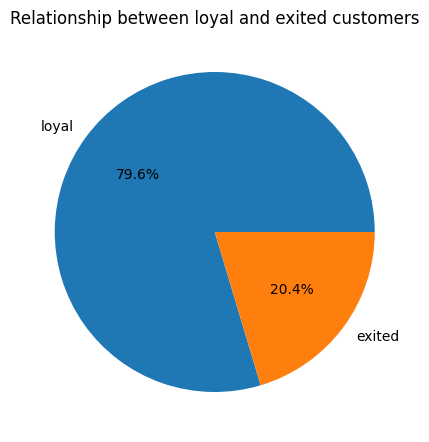

In [57]:
exited = churn_data['Exited'].value_counts()

# Pie chart was chosen because of the relationship between just two categories.
exited_pie = plt.figure(figsize=(4, 4))
axes = exited_pie.add_axes([0, 0, 1, 1])
axes.pie(
    exited,
    labels=['loyal', 'exited'],
    autopct='%.1f%%',
    explode = [0, 0]
);
axes.set_title('Relationship between loyal and exited customers');


Из данной круговой диаграммы видно, что количество лояльных клиентов большинство и превышает количество ушедших примерно в 4 раза

### Задание 2 - Распределение баланса пользователей, у которых на счету больше 2500$

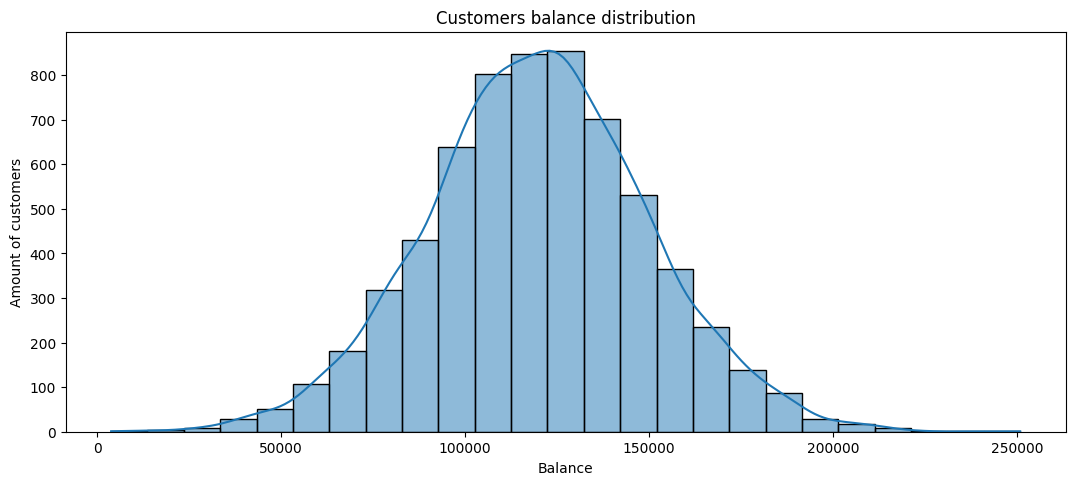

In [20]:
rich_customers_mask = (churn_data['Balance'] > 2500)
rich_customers = churn_data[rich_customers_mask]

# Histogram - because of distribution by one criteria('Balance')
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
sns.histplot(
    data=rich_customers,
    x='Balance',
    kde=True,
    bins=25
);
axes.set_ylabel('Amount of customers');
axes.set_title('Customers balance distribution');

Из гистограммы можно сделать вывод, что у основного количества клиентов банка сумма на счету составляет от 100000$ до 150000$

### Задание 3 - Отличие суммы накопительного счета у ушедших и лояльных клиентов

C:\Users\nikolai.grebenkin.SSI-RU\AppData\Local\Temp\ipykernel_29368\1442638438.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_yticklabels(['loyal', 'exited']);


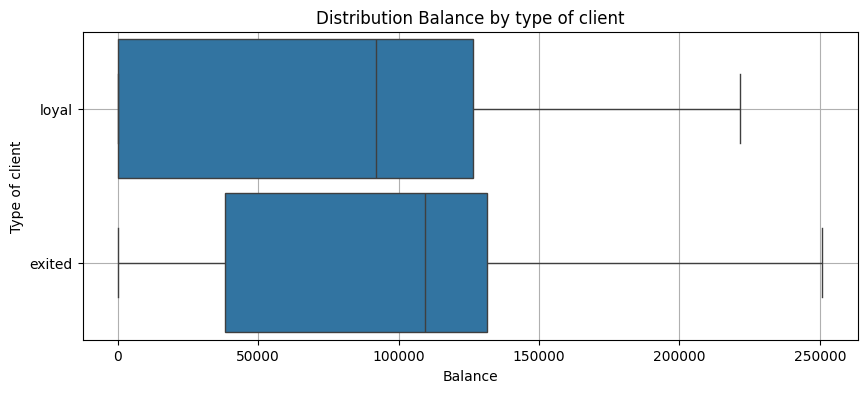

In [25]:
fig = plt.figure(figsize=(10,4))
boxplot = sns.boxplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    orient='h',
    width=0.9
);
boxplot.grid();
boxplot.set_yticklabels(['loyal', 'exited']);
boxplot.set_ylabel('Type of client');
boxplot.set_title('Distribution Balance by type of client');


Видно, что медианный баланс у ушедших клиентов больше, чем у оставшихся, максимальная сумма также выше.\
Такие заключения подталкивают на мысль, что клиенты могут уходить не по причине отсутствия денежных средств на счетах или отсутствия необходимости в использовании услуг банка, а потому что их может не устраивать обслуживание или условия.

### Задание 4 - Распределение возраста в разрезе признака оттока

C:\Users\nikolai.grebenkin.SSI-RU\AppData\Local\Temp\ipykernel_29368\959230564.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_yticklabels(['loyal', 'exited']);


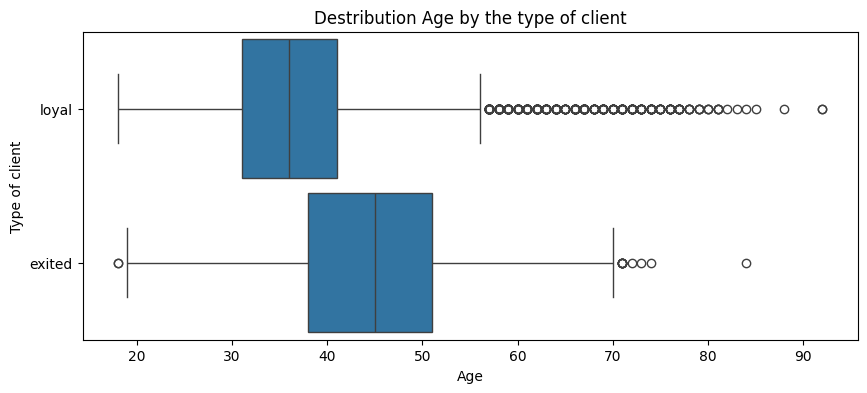

In [26]:
fig = plt.figure(figsize=(10,4))
boxplot = sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited',
    orient='h',
    width=0.9
);
boxplot.set_yticklabels(['loyal', 'exited']);
boxplot.set_ylabel('Type of client');
boxplot.set_title('Destribution Age by the type of client');

Банку следует обратить внимание на категорию людей от 40 до 50 лет (45 - в особенности).
Выбросов (аномалий) больше в группе лояльных клиентов.

### Задание 5 - Взаимосвязь кредитного рейтинга и его предполагаемой зарплаты

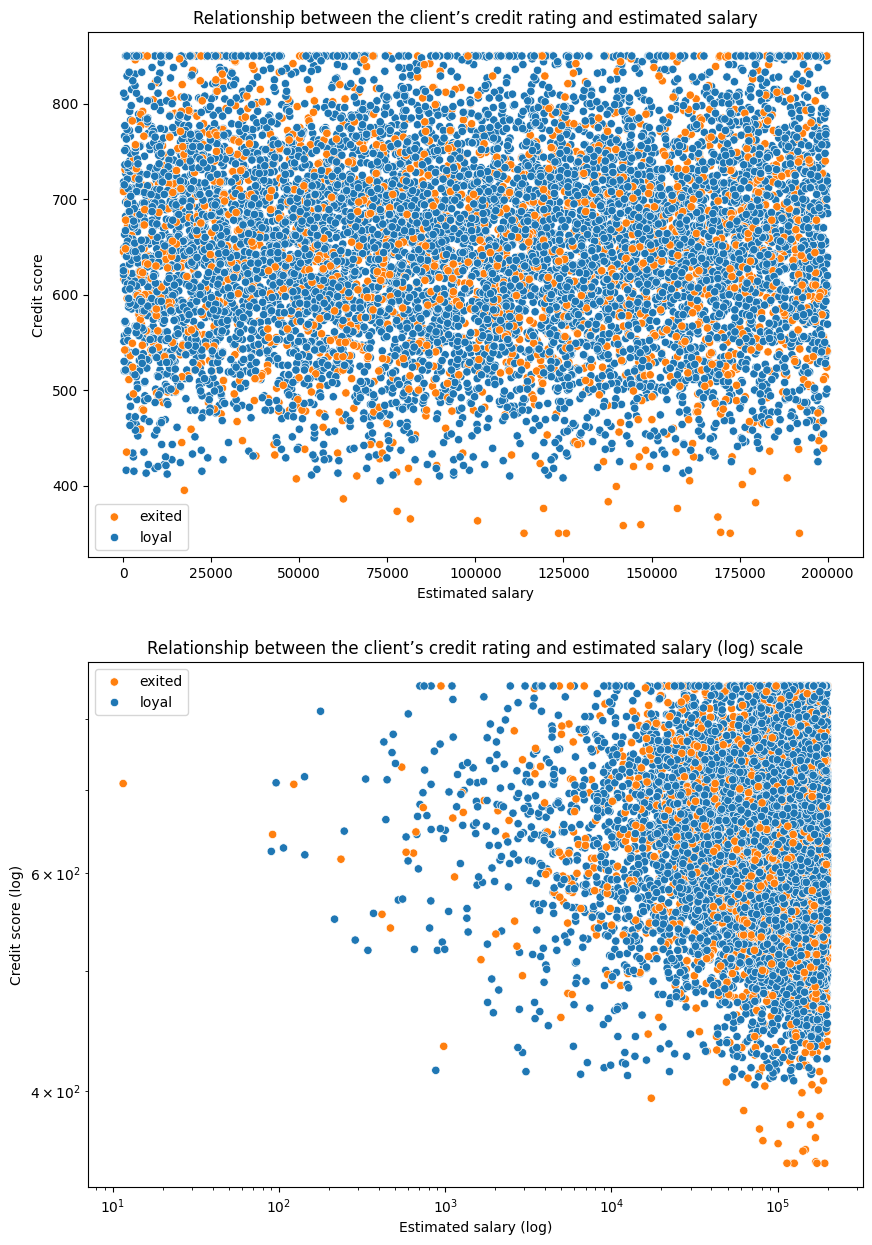

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))
scatterplot = sns.scatterplot(
    data=churn_data,
    y='CreditScore',
    x='EstimatedSalary',
    hue='Exited',
    ax=axes[0],
    legend=['loyal', 'exited']
);
axes[0].set_title("Relationship between the client’s credit rating and estimated salary");
scatterplot_log = sns.scatterplot(
    data=churn_data,
    y='CreditScore',
    x='EstimatedSalary',
    hue='Exited',
    ax=axes[1],
);
axes[1].set_title("Relationship between the client’s credit rating and estimated salary (log) scale");

scatterplot_log.set_xscale('log')
scatterplot_log.set_yscale('log')

scatterplot.legend(['exited', 'loyal']);
scatterplot_log.legend(['exited', 'loyal']);

scatterplot.set_ylabel('Credit score');
scatterplot_log.set_ylabel('Credit score (log)');

scatterplot.set_xlabel('Estimated salary');
scatterplot_log.set_xlabel('Estimated salary (log)');



По диаграммам рассеяния - нет никакой явной взаимосвязи между кредитным рейтингом и предполагаемой зарплатой (ни по обычной шкале, ни по логарифмической).\
Так как у клиентов с большой заработной платой может быть высокий и низкий рейтинг, тогда как у клиентов с маленькой заработной платой - тоже самое.

### Задание 6 - Кто больше уходит, мужчины или женщины

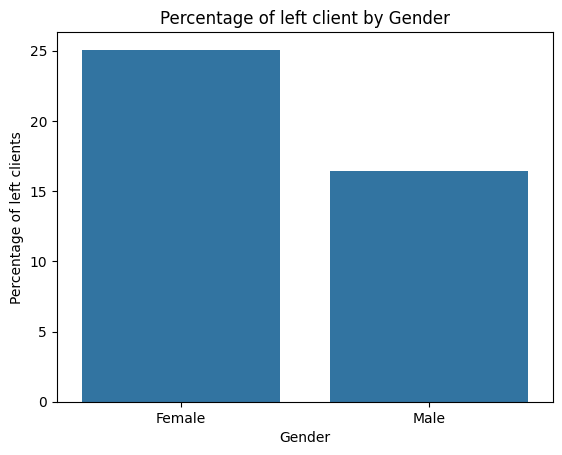

In [81]:
exited_people = churn_data.groupby('Gender')['Exited'].mean() * 100
exited_people = exited_people.reset_index()
#display(exited_people)

barplot = sns.barplot(
    data=exited_people,
    x='Gender',
    y='Exited'
)
barplot.set_ylabel('Percentage of left clients');
barplot.set_title('Percentage of left client by Gender');

Чаще от банковских услуг отказываются женщины

### Задание 7 - Зависимость оттока клиентов от приобритеных услуг

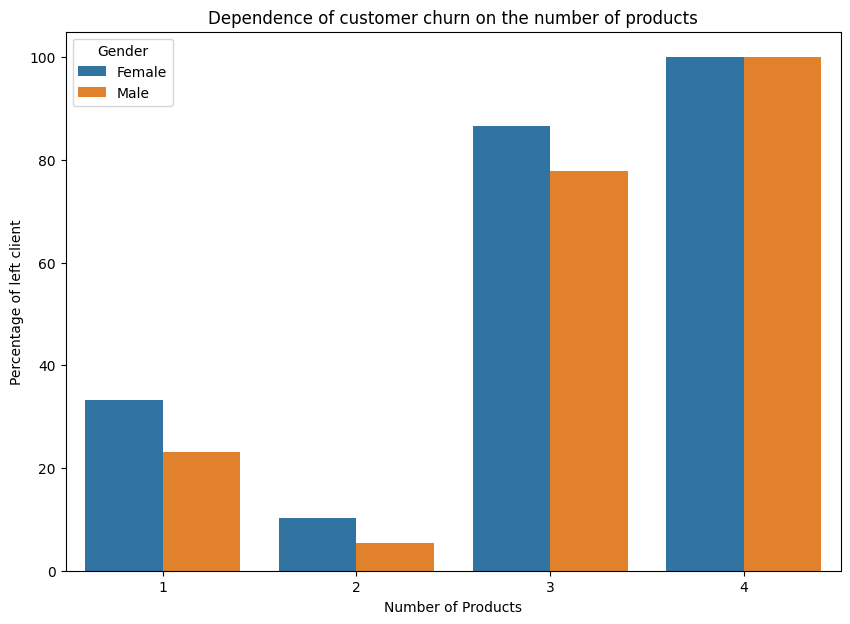

In [95]:
cust_churn_no_prod = churn_data.groupby(['NumOfProducts', "Gender"])['Exited'].mean() * 100
cust_churn_no_prod = cust_churn_no_prod.reset_index()

fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=cust_churn_no_prod,
    x='NumOfProducts',
    y='Exited',
    hue='Gender',
    errorbar=None
);
barplot.set_title('Dependence of customer churn on the number of products');
barplot.set_xlabel('Number of Products');
barplot.set_ylabel('Percentage of left client');

Из графика можно сделать вывод, когда у клиента больше 2 продуктов, то он(она) уходит из банка практически со 100% вероятностью. Оптимальное количество продуктов для клиента - 2. Гендер практически никак не влияет на принятие решения об уходе. \
 Этот результат подтверждает вывод из Задания 3.


### Задание 8 - Как влияет наличие статуса активного клиента на отток клиентов

In [119]:
active_memb_churn = churn_data.groupby('IsActiveMember')['Exited'].value_counts()
active_memb_churn = active_memb_churn.reset_index()
active_memb_churn = active_memb_churn[active_memb_churn['Exited'] == 1]
active_memb_churn['IsActiveMember'] = active_memb_churn['IsActiveMember'].replace({0: 'Not Active member', 1: 'Active member'})

fig = px.pie(
    active_memb_churn,
    values='count',
    names='IsActiveMember',
    title='Ratio of Active Member status to churn clients',
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


Отток клиентов происходит чаще всего, когда нет статуса активного клиента.\
Следовательно, чтобы уменьшить отток, можно попробовать давать статусы активного клиента

### Задание 9 - В какой стране доля ушудших клиентов больше

In [151]:
geography_exited = churn_data.groupby('Geography')['Exited'].sum()
geography_exited = geography_exited.reset_index()
geography_exited.columns = ['country', 'number exited']

fig = px.choropleth(
    geography_exited,
    locations='country',
    locationmode='country names',
    color='number exited',
    range_color=[0, geography_exited['number \  exited'].max()],
    height=500,
    width=700,
    color_continuous_scale='Reds',
    scope='europe'
)
fig.show()

Страна с максимальным количество отказавшихся от обслуживания - Германия.\
Может быть с связано, что это немецкий банк и большинство клиентов - немцы.

P.S. Если честно, не вижу никакой взаимосвязи, максимум, что могу сказать из данной информации, что банк Европейский, не очень большой, который обслуживает определенную часть Европы.

### Задание 10 - Тепловая карта с аннотацией по кредитному рейтингу

In [184]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"


# Creating pivot table
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot_table = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc='mean'
)

# Plotting Heatmap
heatmap = px.imshow(
    pivot_table,
    color_continuous_scale="ylorrd",
)

# Update the setting for Heatmap
heatmap.update_layout(
    title={
        'text': "Heatmap for determine who leave most often",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 24,
            'color': 'black'
        }
    },
    yaxis_title='Category of Credit Score',
    coloraxis_colorbar=dict(
        title='Mean value for left client'
    )
)

Чаще всего уходят клиенты очень бедные и меньше, чем с 1 годом владения аккаунтом